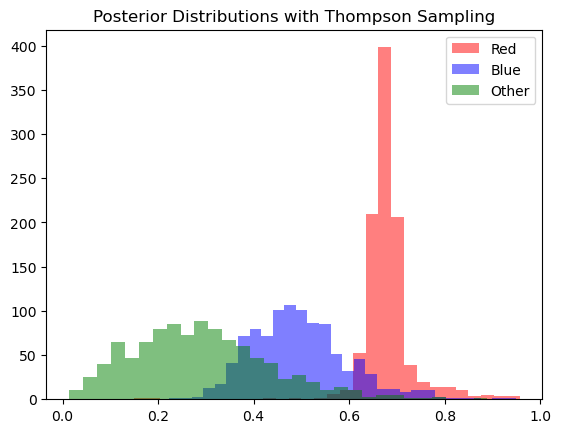

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Prior parameter uniform
alpha_prior = 1
beta_prior = 1

num_iterations = 1000

# Posterior parameters
alpha_posterior_red, beta_posterior_red = alpha_prior, beta_prior
alpha_posterior_blue, beta_posterior_blue = alpha_prior, beta_prior
alpha_posterior_other, beta_posterior_other = alpha_prior, beta_prior

posterior_samples_red = []
posterior_samples_blue = []
posterior_samples_other = []

for i in range(num_iterations):
    # Sample from posteriors
    sample_red = stats.beta.rvs(alpha_posterior_red, beta_posterior_red)
    sample_blue = stats.beta.rvs(alpha_posterior_blue, beta_posterior_blue)
    sample_other = stats.beta.rvs(alpha_posterior_other, beta_posterior_other)
    
    # Choose the option with the highest sampled value
    chosen_option = np.argmax([sample_red, sample_blue, sample_other])
    # Simulate data for the chosen option
    if chosen_option == 0:
        data = stats.binom(n=1, p=0.7).rvs(size=1)
        alpha_posterior_red += data
        beta_posterior_red += (1 - data)
    elif chosen_option == 1:
        data = stats.binom(n=1, p=0.5).rvs(size=1)
        alpha_posterior_blue += data
        beta_posterior_blue += (1 - data)
    else:
        data = stats.binom(n=1, p=0.3).rvs(size=1)
        alpha_posterior_other += data
        beta_posterior_other += (1 - data)
    
    # Store samples for plotting
    posterior_samples_red.append(sample_red)
    posterior_samples_blue.append(sample_blue)
    posterior_samples_other.append(sample_other)

# Plot posterior distributions
plt.hist(posterior_samples_red, bins=30, alpha=0.5, label='Red', color='red')
plt.hist(posterior_samples_blue, bins=30, alpha=0.5, label='Blue', color='blue')
plt.hist(posterior_samples_other, bins=30, alpha=0.5, label='Other', color='green')
plt.legend()
plt.title('Posterior Distributions with Thompson Sampling')
plt.show()

Here I initialize my beta distribution with alpha values 1 and 1 to act as a uniform distribution. After this I sample from the posterior distribution and decide whether I want to choose A, B, or C by selecting the maximum of the sample. After selecting a category I use a Bernouilli distribution to simulate the data. Then I update the values for alpha and beta to update my beliefs of the prior distribution for the chosen category. I did so by:
$$\alpha_{k + 1} = \alpha_k + x$$
$$\beta_{k + 1} = \beta_k + 1 - x$$
Where k is the iteration and $x \in \{0, 1\}$

After running 1000 iterations I plot the values for the posterior distributions and it seems to have captured the true value of $\theta$ especially for Red, which had the highest chance of success (which also led to the most updates performed on it). To balance exploration and exploitation I selected the max of the sampled posterior distribution, this allows me to exploit my prior knowledge while also sometimes exploring other possibilities depending on the sampled value.

## Questions

### What is the data
The data is synthetically generated using a binomial distribution where each choice of A, B, and C have a different probability of success.

### What is the update rule
Using the beta binomial distribution the update rule is:
$$\alpha_{k + 1} = \alpha_k + x$$
$$\beta_{k + 1} = \beta_k + 1 - x$$
Where k is the iteration and $x \in \{0, 1\}$

### Which one of the three choices will you try out? How will you choose?
To balance the exploration vs exploitation tradeoff I will select the max category by choosing the one that has the highest value sampled from its posterior distribution. This allows me to exploit the games that give me high success and occasionally explore other options to see whether those games are better than the one I am currently exploiting.